---

<center>

# **12 Steps to Navier-Stokes**

<center>

---


## Step 7: 2D Diffusion

---

We are clearly building up the same way as we did with one dimension, going from linear convection, then non-linearity, now diffusion and in the next step, Burger's equation.

Now, **2D diffusion**

$$\frac{\partial u}{\partial t} = \nu \frac{\partial ^2 u}{\partial x^2} + \nu \frac{\partial ^2 u}{\partial y^2}$$

You will recall that we came up with a method for discretizing second order derivatives in Step 3, when investigating 1-D diffusion.  We are going to use the same scheme here, with our forward difference in time and two second-order derivatives. 

Once again, **we reorganize the discretized equation and solve for $u_{i,j}^{n+1}$**

$$u_{i,j}^{n+1} = u_{i,j}^n + \frac{\nu \Delta t}{\Delta x^2}(u_{i+1,j}^n - 2 u_{i,j}^n + u_{i-1,j}^n) + \frac{\nu \Delta t}{\Delta y^2}(u_{i,j+1}^n-2 u_{i,j}^n + u_{i,j-1}^n)$$

Continue with the code

In [2]:
import numpy as np
import sympy as smp
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import PillowWriter
from matplotlib.ticker import FormatStrFormatter

In [20]:
x_points = 101                                 # Number of x grid points
y_points = 101                                 # Number of y grid points
grid_length = 2                                # Lenght of the grid
dx = grid_length / (x_points - 1)              # Distance between adjacent x grid points
dy = grid_length / (x_points - 1)              # Distance between adjacent y grid points
time_steps = 275                               # Number of time steps
sigma = 0.25                                   # CFL number
nu = 0.07                                      # Diffusion coefficient
dt = sigma * ((dx * dy) / nu)                  # Size of time steps

# Define 2D space grid

x = np.linspace(0, grid_length, x_points)
y = np.linspace(0, grid_length, y_points)
X, Y = np.meshgrid(x, y)

# Define wave arrays

u = np.ones((y_points, x_points)) 
u_n = u.copy()

# Define IC's

u[int(0.5/dy):int((1.5/dy) + 1), int(0.5/dx):int((1.5/dx) + 1)] = 2

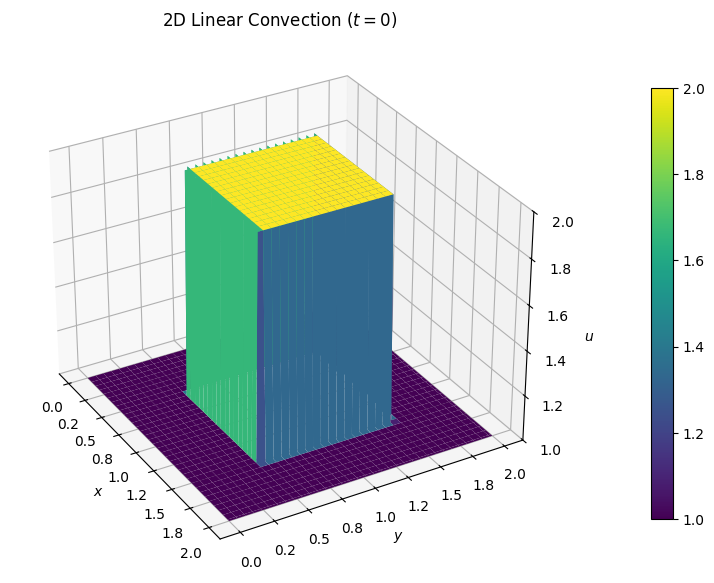

In [21]:
fig, axis = plt.subplots(subplot_kw={"projection":"3d"}, dpi=100, figsize= (11,7))
ax = axis.plot_surface(X, Y, u[:], cmap='viridis', linewidth=0)
axis.set_title(r'2D Linear Convection ($t=0$)')
axis.set_zlim(1, 2)
axis.set_ylabel('$y$')
axis.set_xlabel('$x$')
axis.set_zlabel('$u$')
axis.view_init(elev=30, azim=-30)
axis.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
axis.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
axis.zaxis.set_major_formatter(FormatStrFormatter('%.1f'))
plt.colorbar(ax, pad=0.12, shrink=0.8)
plt.show()

Now, the iteration process

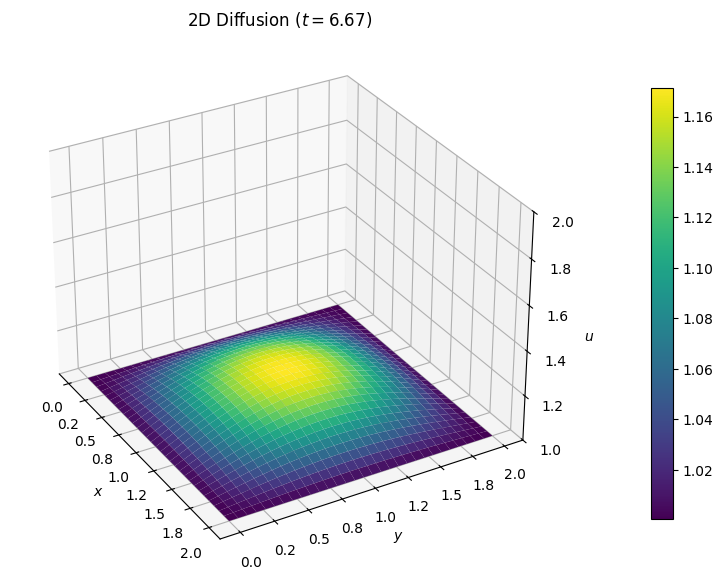

In [59]:
x_points = 31                                 # Number of x grid points
y_points = 31                                 # Number of y grid points
grid_length = 2                                # Lenght of the grid
dx = grid_length / (x_points - 1)              # Distance between adjacent x grid points
dy = grid_length / (x_points - 1)              # Distance between adjacent y grid points
time_steps = 300                               # Number of time steps
sigma = 0.25                                   # CFL number
nu = 0.05                                      # Diffusion coefficient
dt = sigma * ((dx * dy) / nu)                  # Size of time steps

# Define 2D space grid

x = np.linspace(0, grid_length, x_points)
y = np.linspace(0, grid_length, y_points)
X, Y = np.meshgrid(x, y)

# Define wave arrays

u = np.ones((y_points, x_points)) 
u_n = u.copy()

# Define IC's

u[int(0.5/dy):int((1.5/dy) + 1), int(0.5/dx):int((1.5/dx) + 1)] = 2

for n in range(time_steps):
    u_n = u.copy()
    u[1:-1, 1:-1] = u_n[1:-1, 1:-1] + (nu * (dt/(dx**2)) * (u_n[1:-1, 2:] - 2*u_n[1:-1, 1:-1] + u_n[1:-1, :-2])) + (nu * (dt/(dy**2)) * (u_n[2:, 1:-1] - 2*u_n[1:-1, 1:-1] + u_n[:-2, 1:-1]))
    u[0, : ] = 1
    u[-1, : ] = 1
    u[ : , 0] = 1
    u[ : , -1] = 1

fig, axis = plt.subplots(subplot_kw={"projection":"3d"}, dpi=100, figsize= (11,7))
ax = axis.plot_surface(X, Y, u[:], cmap='viridis', linewidth=0)
axis.set_title(rf'2D Diffusion ($t={time_steps*dt:.2f}$)')
axis.set_zlim(1, 2)
axis.set_ylabel('$y$')
axis.set_xlabel('$x$')
axis.set_zlabel('$u$')
axis.view_init(elev=30, azim=-30)
axis.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
axis.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
axis.zaxis.set_major_formatter(FormatStrFormatter('%.1f'))
plt.colorbar(ax, pad=0.12, shrink=0.8)
plt.show()


The wave clearly diffused, it is no longer the hat squared ugly function, now the fun part, animated

In [60]:
x_points = 31                                 # Number of x grid points
y_points = 31                                 # Number of y grid points
grid_length = 2                                # Lenght of the grid
dx = grid_length / (x_points - 1)              # Distance between adjacent x grid points
dy = grid_length / (x_points - 1)              # Distance between adjacent y grid points
time_steps = 300                               # Number of time steps
sigma = 0.25                                   # CFL number
nu = 0.05                                      # Diffusion coefficient
dt = sigma * ((dx * dy) / nu)                  # Size of time steps

# Define 2D space grid

x = np.linspace(0, grid_length, x_points)
y = np.linspace(0, grid_length, y_points)
X, Y = np.meshgrid(x, y)

# Define wave arrays

u = np.ones((y_points, x_points)) 
u_n = u.copy()

# Define IC's

u[int(0.5/dy):int((1.5/dy) + 1), int(0.5/dx):int((1.5/dx) + 1)] = 2

plt.ioff()
fig, axis = plt.subplots(subplot_kw={"projection": "3d"}, dpi=100, figsize=(11, 7))
axis.set_title(rf'2D Diffusion (from $t=0$ to $t={(time_steps)*dt:.2f}$)')
axis.set_zlim(1, 2)
axis.set_ylabel('y')
axis.set_xlabel('x')
axis.set_zlabel('u')
axis.view_init(elev=30, azim=-30)
axis.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
axis.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
axis.zaxis.set_major_formatter(FormatStrFormatter('%.1f'))

wave = axis.plot_surface(X, Y, u, cmap='viridis', linewidth=0)
plt.colorbar(wave, ax=axis, pad=0.12, shrink=0.8)


def init():
    axis.clear()
    axis.set_title(rf'2D Diffusion (from $t=0$ to $t={(time_steps)*dt:.2f}$)')
    axis.set_zlim(1, 2)
    axis.set_ylabel('y')
    axis.set_xlabel('x')
    axis.set_zlabel('u')
    axis.view_init(elev=30, azim=-30)
    axis.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
    axis.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
    axis.zaxis.set_major_formatter(FormatStrFormatter('%.1f'))
    wave = axis.plot_surface(X, Y, u, cmap='viridis', linewidth=0)
    return wave,

def update_anim(frame):
    u_n = u.copy()
    u[1:-1, 1:-1] = u_n[1:-1, 1:-1] + (nu * (dt/(dx**2)) * (u_n[1:-1, 2:] - 2*u_n[1:-1, 1:-1] + u_n[1:-1, :-2])) + (nu * (dt/(dy**2)) * (u_n[2:, 1:-1] - 2*u_n[1:-1, 1:-1] + u_n[:-2, 1:-1]))
    u[0, : ] = 1
    u[-1, : ] = 1
    u[ : , 0] = 1
    u[ : , -1] = 1

    axis.clear()
    axis.set_title(rf'2D Diffusion (from $t=0$ to $t={(time_steps)*dt:.2f}$)')
    axis.set_zlim(1, 2)
    axis.set_ylabel('y')
    axis.set_xlabel('x')
    axis.set_zlabel('u')
    axis.view_init(elev=30, azim=-30)
    axis.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
    axis.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
    axis.zaxis.set_major_formatter(FormatStrFormatter('%.1f'))
    wave = axis.plot_surface(X, Y, u, cmap='viridis', linewidth=0)
    return wave,


anim = animation.FuncAnimation(
                fig = fig,
                func = update_anim,
                init_func = init,
                frames = time_steps,
                interval = 50
)

anim.save('2D_diffusion.mp4', writer=animation.FFMpegWriter(fps=30))

plt.ion()